In [2]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

## Load processed data

In [3]:
df = pd.read_csv("../data/processed/temperature_data.csv")

In [4]:
df.shape

(22695, 2)

## Split data into train and test

In [5]:
train_idx = df.shape[0] * 0.4
train_idx

9078.0

In [6]:
train_data = df.loc[:train_idx]
test_data = df.loc[train_idx:]

In [7]:
train_data.shape, test_data.shape

((9079, 2), (13617, 2))

In [8]:
train_data.head()

,value,anomaly
0,73.967322,-1
1,74.935882,-1
2,76.124162,-1
3,78.140707,-1
4,79.329836,-1


## Preprocess the data

In [9]:
# Normalize the data using standard scaler
scaler = StandardScaler()
train_data.loc[:, 'value'] = scaler.fit_transform(train_data['value'].values.reshape(-1, 1))

C:\Users\z003zxuz\AppData\Local\Temp\ipykernel_25036\867802294.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.loc[:, 'value'] = scaler.fit_transform(train_data['value'].values.reshape(-1, 1))


## Train an isolation forest model

In [10]:
model = IsolationForest(n_estimators=100, contamination=0.01)
model.fit(train_data['value'].values.reshape(-1, 1))

IsolationForest(contamination=0.01)

## Evaluate the model

In [11]:
test_data.loc[:, 'value'] = scaler.transform(test_data['value'].values.reshape(-1, 1))
test_data.loc[:, 'prediction'] = model.predict(test_data['value'].values.reshape(-1, 1))

C:\Users\z003zxuz\AppData\Local\Temp\ipykernel_25036\609040196.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, 'value'] = scaler.transform(test_data['value'].values.reshape(-1, 1))
C:\Users\z003zxuz\AppData\Local\Temp\ipykernel_25036\609040196.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.loc[:, 'prediction'] = model.predict(test_data['value'].values.reshape(-1, 1))


In [12]:
test_data.head()

,value,anomaly,prediction
9078,-6.903851,-1,-1
9079,0.240219,-1,1
9080,0.123940,-1,1
9081,0.218608,-1,1
9082,0.134533,-1,1


In [13]:
test_data['anomaly'].value_counts()

-1    12483
 1     1134
Name: anomaly, dtype: int64

In [14]:
test_data['prediction'].value_counts()

 1    13151
-1      466
Name: prediction, dtype: int64

## Plot results

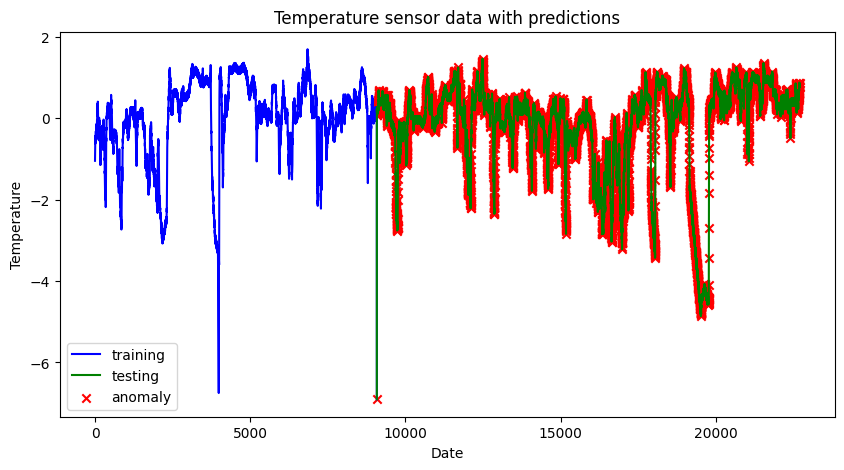

In [15]:
ax = train_data['value'].plot(figsize=(10,5), label='training', color='blue')
ax = test_data['value'].plot(figsize=(10,5), label='testing', color='green')
predictions = test_data["prediction"] == -1
ax.scatter(test_data.index, test_data['value'], color='red', label='anomaly', marker='x')
plt.legend()
ax.set_xlabel('Date')
ax.set_ylabel('Temperature')
ax.set_title('Temperature sensor data with predictions')
plt.show()

In [16]:
y_pred = model.predict(test_data[['value']])

# Compute the F1 score
f1 = f1_score(test_data['anomaly'], y_pred, pos_label=-1)

print(f'F1 score: {f1}')

d:\LDA\mlops-platform-evaluation\.venv\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but IsolationForest was fitted without feature names
  warnings.warn(


F1 score: 0.0030890416248358942


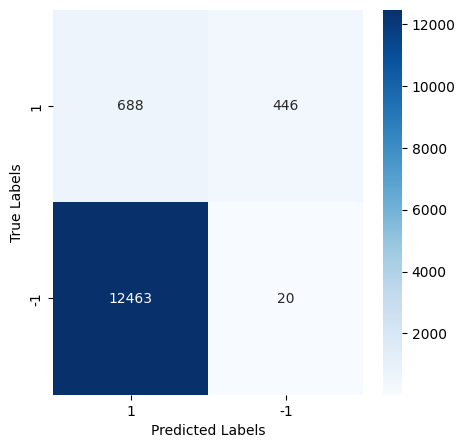

In [17]:
# Compute the confusion matrix
cm = confusion_matrix(test_data['anomaly'], y_pred, labels=[1, -1])

# Plot the confusion matrix
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['1', '-1'], yticklabels=['1', '-1'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()